<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#일원배치-분산분석" data-toc-modified-id="일원배치-분산분석-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>일원배치 분산분석</a></span></li><li><span><a href="#이원배치-분산분석" data-toc-modified-id="이원배치-분산분석-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>이원배치 분산분석</a></span></li></ul></div>

# 일원배치 분산분석

In [2]:
import scipy.stats as stats  
import pandas as pd
Iris_data = pd.read_csv("./data/iris.csv")
Iris_data.head(100)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
Iris_data["target"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
Iris_data.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [6]:
target_list = Iris_data["target"].unique()
setosa = Iris_data[Iris_data["target"]==target_list[0]]["sepal width"]
versicolor = Iris_data[Iris_data["target"]==target_list[1]]["sepal width"]
virginica = Iris_data[Iris_data["target"]==target_list[2]]["sepal width"]
print(target_list)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


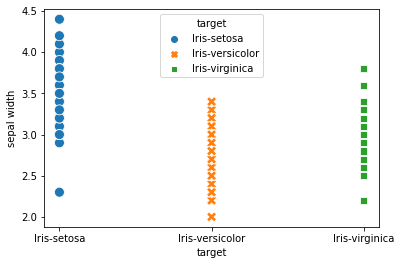

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=Iris_data)
plt.show()

시각화해보았을 때, 3종류의 Sepal.Width의 평균은 차이가 있어 보인다. 통계적으로 차이가 있는지를 검정해보자. 검정을 수행하기에 앞서 설정할 수 있는 가설은 아래와 같다.
<li> 귀무가설 : 세가지 종에 대해 Sepal.Width의 평균은 모두 같다.
<li> 대립가설 : 적어도 하나의 종에 대한 Sepal.Width의 평균값에는 차이가 있다.

In [14]:
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


shapiro.test 결과 3개의 표본 모두 p-value>0.05이므로 정규성을 만족하므로 등분산 검정 시행한다.(하나의 표본이라도 정규성을 만족하지 않는다면 kruskal을 고려해야함)

In [15]:
stats.levene(setosa,versicolor,virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

p-value가 유의수준(0.05)보다 크기 때문에 귀무가설 채택하여 세 집단 간 분산이 같다고 할 수 있으므로 ANOVA검정을 시행한다.

In [16]:
stats.f_oneway(setosa,versicolor,virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

**사후 검정이란 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통꼐적으로 증명되었을 경우(p-value<0.05), 어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석이다. 사후분석의 종류로는 던칸의 MRT, vltudml의  LSD, 튜키의 HSD 방법 등이 있다!

그렇다면 세 가지 종들 중 특히 어떠한 종들 간에 꽃받침의 폭에 차이가 있는지를 파악하기 위해 사후검정을 수행해보자

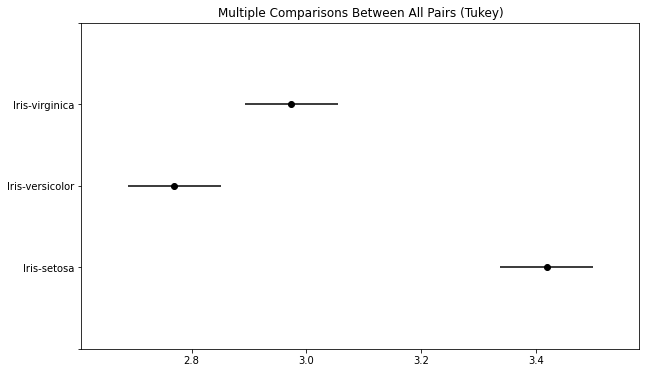

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data= Iris_data["sepal width"], groups=Iris_data["target"] )
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()


<p>사후 분석에서는 귀무가설을 "집단들 사이의 평균은 같다"로 두고 대립가설을 "집단들 사이의 평균은 같지 않다"로 둔다. 그리고 모든 집단 수준에 대하여 두 집단씩 짝을 지어 각각 다중 비교를 수행한다.</p>

<p>예제의 사후분석 결과를 살펴보면 Iris-setosa, Iris-versicolor, Iris-virginica의 세 가지 비교애 대해서 모두 수정된 p-value 값(p-adj)이 0.05보다 작으므로, 각각의 비교에 대한 귀무가설을 모두 기각한다. 즉, 모든 종들에 대해서 꽃받침 폭의 평균값은 통계적으로 유의한 차이가 있다는 것을 알 수 있다.</p>
<p>또한 diff는 차이(오른쪽 집단-왼쪽 집단) 값을 나타내는데, setosa - versicolor에 대한 diff 값은 음수이므로, versico,ior일때 보다 setosa일 때 꽃받침의 폭이 통계적으로 유의하게 큰 값을 가진다고 해석할 수 있다.</p>

#만약 정규성을 만족하지 못했을 경우 kruskal 검정을 진행하면 된다.

In [10]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


In [11]:
#만약 정규성을 만족하지 못했을 경우 kruskal 검정을 진행하면 된다.
stats.kruskal(setosa,versicolor,virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

<p>만약 정규성을 만족하지 못했을 경우 kruskal 검정을 진행하면 된다.</p>
<p> 만약 등분산성을 만족하지 못했을 경우, welch_anova분석을 시행하면 된다.</p>

In [12]:
# pip install pingouin 
# conda install pingouin
import pingouin as pg
pg.welch_anova(data = Iris_data, dv ='sepal width', between='target')


,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# 이원배치 분산분석

In [1]:
# 데이터 불러오기
import pandas as pd
mtcars = pd.read_csv('../data/mtcars.csv')
mtcars.head()


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
## cyl, am, mpg 변수들로만 구성된 분석용 데이터셋 생성 
mtcars = mtcars[["mpg","am","cyl"]]
mtcars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [3]:
## 분산분석 수행 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


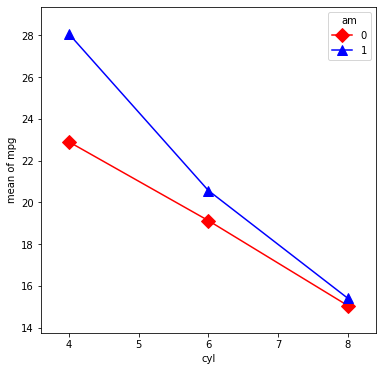

In [4]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

## 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
cyl = mtcars["cyl"]
am = mtcars["am"]
mpg = mtcars["mpg"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl,am, mpg,
                       colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)
